In [1]:
import utils.data as data
import utils.architectures as architectures
import utils.sub_architectures as sub_architectures
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import expit
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse

In [2]:
dataset = data.MultiViewTemporalDataset(mode="validation", apply_mask=True)

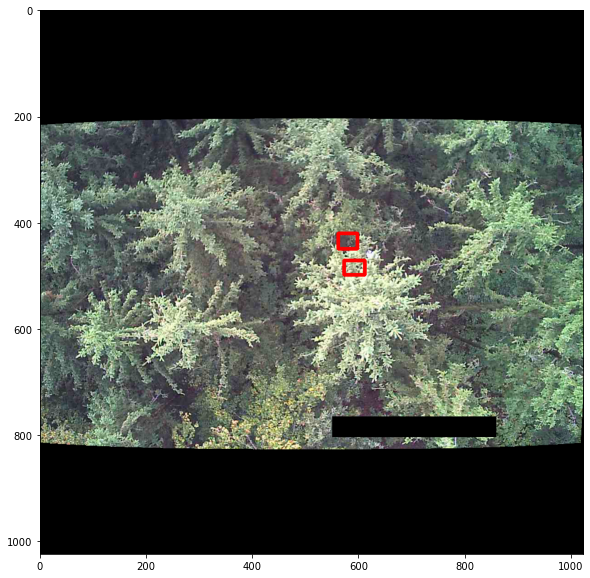

<Figure size 720x720 with 0 Axes>

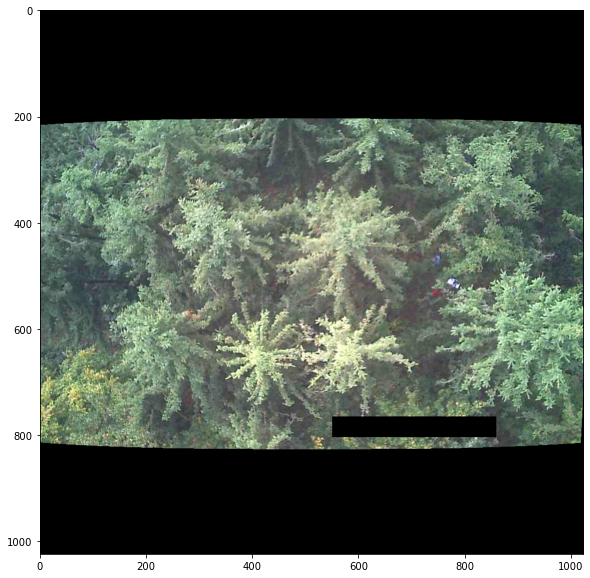

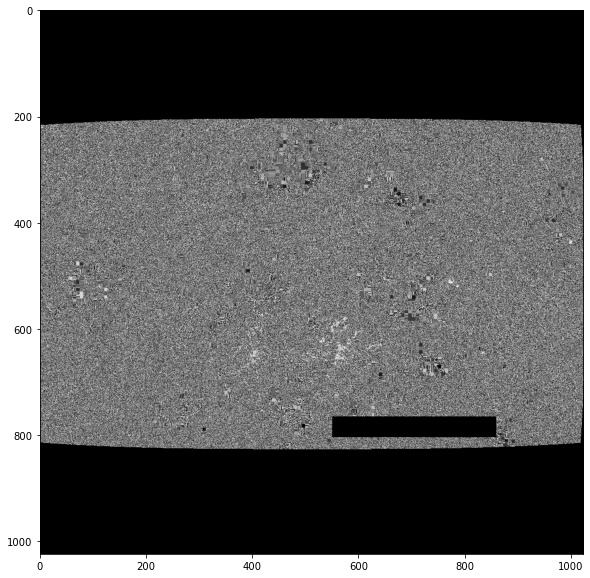

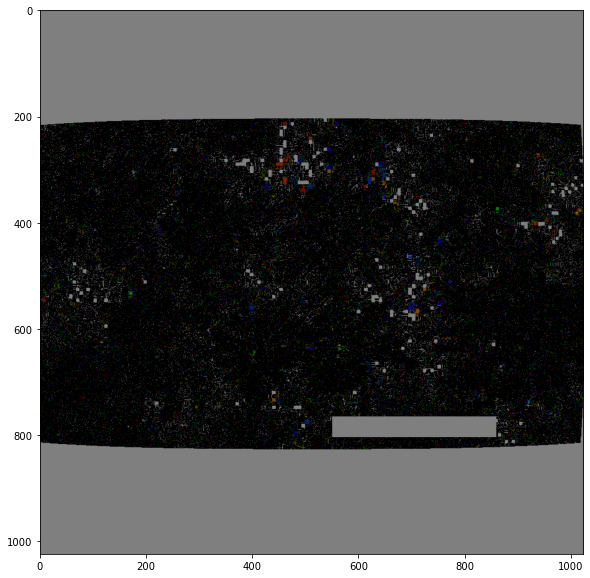

Semantic difference:  0.747142211257721


In [22]:
#anomaly_detection = architectures.BasicConvolutionalAnomalyDetection()
timestep_anomaly_detection = architectures.BasicTimestepAnomalyDetection()

#test_samples = architectures.MultiViewTemporalSample("data\\validation\\valid-1-0\\", 'validation')
#print(test_samples.photos.shape)

test_sample = dataset[8]
test_sample.draw_labels()
#test_sample.show_photo_grid()

img=test_sample.photos

plt.figure(figsize=(10,10))

diff_total = np.zeros((1024,1024,3))

#for p in range(0,9): #for every perspective
    #for t in range(0,6): # for every timestep
        #diff_total += (((img[t+1][p+1] - img[t][p]))*(1/(256*6*9)))
        #diff_total += (((img[t+1][p] - img[t][p]))*(1/(256*6*9)))
        #diff_total += (((img[t][p+1] - img[t][p]))*(1/(256*6*9)))
        #diff_total += (((img[t+1][p] - img[t][p]))*(1/(256*6*9)))

#diff_total/=6

#plt.figure(figsize=(10,10))
#plt.imshow(img[6][0])
#plt.show()
plt.figure(figsize=(10,10))
plt.imshow(img[5][0])
plt.show()

#plt.figure(figsize=(15,15))
#plt.imshow((img[6][0])[:,:,0]-(img[5][0])[:,:,0], cmap='gray')
#plt.show()

plt.figure(figsize=(10,10))
diff1 = 1-((img[5][0])[:,:,1]**2-(img[5][0])[:,:,1]) 
diff2 = 1-((img[5][0])[:,:,2]**2-(img[5][0])[:,:,2])
plt.imshow(diff1*0.5 + diff2*0.5, cmap='gray')
plt.show()

#sigmoid
plt.figure(figsize=(10,10))
plt.imshow(1-expit((img[6][0] - img[5][0])))
plt.show()

print("Semantic difference: ", ssim(img[6][0], img[5][0], multichannel=True))

#timestep_anomaly_detection.infer(test_samples)

#TODO:
#Step 1: Select grid from all images
#Step 2: Put each grid-image into the autoencoder that is passed
#Step 3: Put the reconstructed images back together (to the original time-view-structure)

#Step a: Take Differences between original and reconstructed
#Step b: Differences between timesteps
#Step c: Warp
#Step d: Combine Timesteps

#Step 4: Threshhold for bounding boxes
#Step 5: Output into the files/return values.

#anomaly_detection.infer()